[*********************100%***********************]  5 of 5 completed


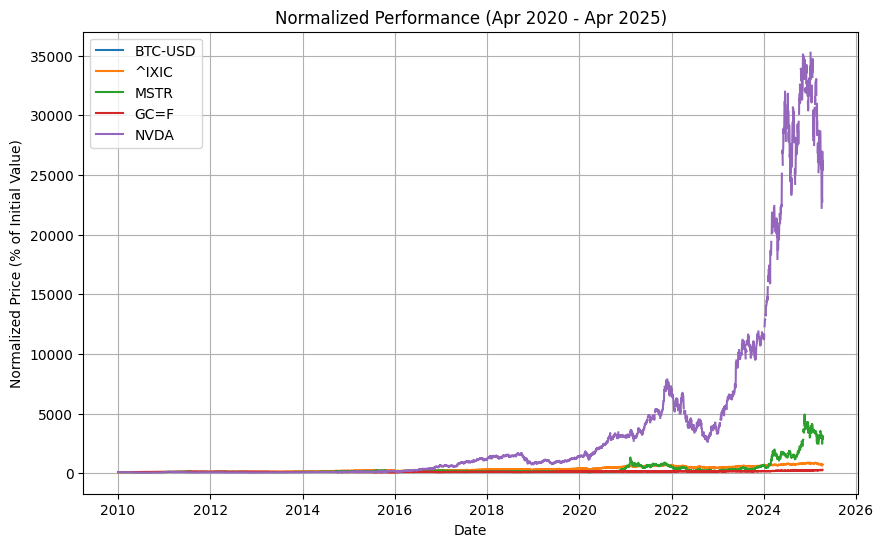

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define tokens in a single list for easy modification
tokens = ['BTC-USD', '^IXIC', 'MSTR', 'GC=F','NVDA']

# Download Close price data for all tokens
data = yf.download(tokens, start='2010-01-01', end='2025-04-15')['Close']

# Normalize prices to compare percentage change
normalized = data / data.iloc[0] * 100

# Plot
plt.figure(figsize=(10, 6))
for token in tokens:
    plt.plot(normalized[token], label=token)
plt.title('Normalized Performance (Apr 2020 - Apr 2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (% of Initial Value)')
plt.legend()
plt.grid()
plt.show()

# Reset index to make 'Date' a column
data_reset = data.reset_index()

# Format date as m/d/yyyy without leading zeros
data_reset['Date'] = data_reset['Date'].dt.month.astype(str) + '/' + \
                     data_reset['Date'].dt.day.astype(str) + '/' + \
                     data_reset['Date'].dt.year.astype(str)

data_reset.to_excel('close_prices.xlsx', sheet_name='Close Prices', index=False)